# 7 Days of Code - Alura

#Importando bibliotecas a serem utilizadas

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateLocator
import json
import requests
import numpy as np

#Carregando os dados

In [28]:
dados_completos = pd.read_csv('/content/dados_completos.csv')

In [29]:
dados_completos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,Genero
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências Aplicadas
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências Aplicadas
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências Aplicadas
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências Aplicadas
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências Aplicadas


##Análise exploratória dos dados

Agora daremos início a análise exploratória dos nossos dados. Para tal, iremos verificar os seguintes pontos:

* Quantidade total de exemplares emprestados com relação ao ano.
* Média de emprestimos de exemplares ao longo dos meses.
* Média de emprestimos de exemplares ao longo do dia.

In [30]:
# Inicialmente vamos criar um DataFrame que contém das datas em que foram realizados empréstimos e o número de emprestimos realizados.

data = pd.to_datetime(dados_completos['data_emprestimo'].unique())
numero = dados_completos['data_emprestimo'].value_counts().to_list()

exemplares_data = pd.DataFrame(
    {
    'data': data,
    'numero_exemplares_retirados' : numero
}
)
exemplares_data.head()

,data,numero_exemplares_retirados
0,2010-01-04 07:44:10.721,3
1,2010-03-01 12:40:56.212,2
2,2010-01-04 07:44:10.750,2
3,2010-02-11 11:16:30.335,2
4,2010-03-04 13:36:26.599,2


In [31]:
# Criando diferentes DataFrames (consultas) para trabalhar com únidades de tempo diferentes

exemplares_ano = exemplares_data.groupby(exemplares_data.data.dt.year).sum()


dicionario_mes = {
    1: 'Jan', 2:'Fev', 3:'Mar', 4:'Abr', 5:'Mai', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Set', 10:'Out', 11:'Nov', 12:'Dez'
}

exemplares_mes = round((exemplares_data.groupby(exemplares_data.data.dt.month).sum())/len(exemplares_ano), 2)
exemplares_mes.index = exemplares_mes.index.map(dicionario_mes)
exemplares_mes.index.name = 'mes'


exemplares_hora = exemplares_data.groupby(exemplares_data.data.dt.hour).sum()/len(exemplares_data['data'].dt.date.unique())
exemplares_hora['hora'] = exemplares_hora.index
exemplares_hora = exemplares_hora.reindex(columns=['hora', 'numero_exemplares_retirados'])
exemplares_hora.reset_index(drop = True, inplace = True)


<ipython-input-31-937bc01323fc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exemplares_ano = exemplares_data.groupby(exemplares_data.data.dt.year).sum()
<ipython-input-31-937bc01323fc>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exemplares_mes = round((exemplares_data.groupby(exemplares_data.data.dt.month).sum())/len(exemplares_ano), 2)
<ipython-input-31-937bc01323fc>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the func

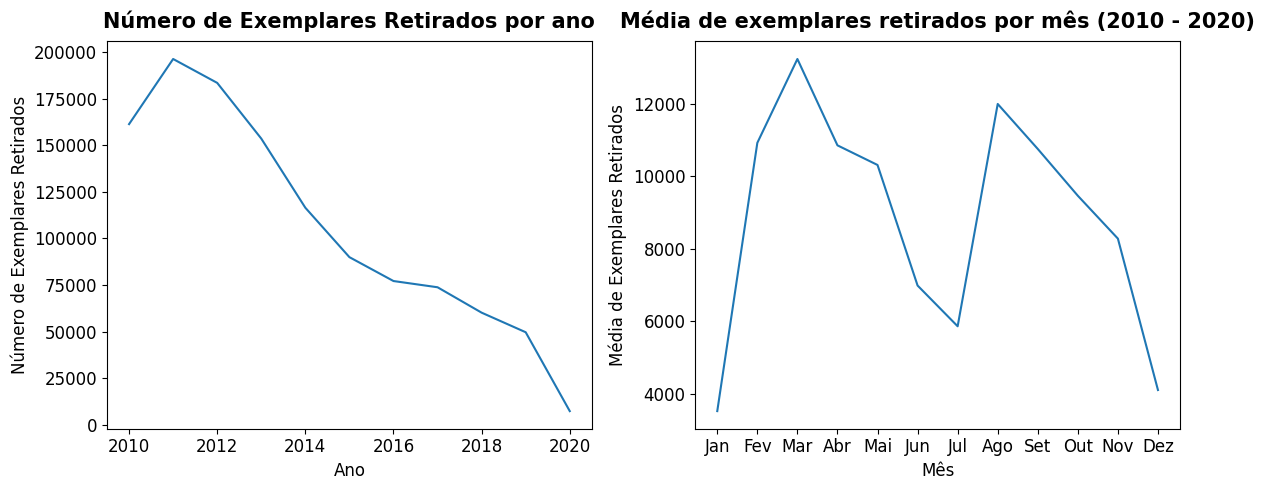

In [32]:
# Criando um figura com dois gráficos referentes a dependencia do número de exemplares emprestados ao longo dos anos e meses.

fig = plt.figure(figsize=(12,5))

plt.subplot(1,2, 1)
ax = sns.lineplot(data = exemplares_ano, x = 'data', y = 'numero_exemplares_retirados')
ax.set_title('Número de Exemplares Retirados por ano', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_xlabel('Ano', fontsize = 12)
ax.set_ylabel('Número de Exemplares Retirados', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)
ax.yaxis.set_tick_params(labelsize = 12)

plt.subplot(1,2,2)
ax = sns.lineplot(data = exemplares_mes, x = 'mes', y = 'numero_exemplares_retirados')
ax.set_title('Média de exemplares retirados por mês (2010 - 2020)', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_xlabel('Mês', fontsize = 12)
ax.set_ylabel('Média de Exemplares Retirados', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)
ax.yaxis.set_tick_params(labelsize = 12)

plt.tight_layout()
plt.show()

Quanto a primeira figura do número de exemplares emprestados ao longo dos anos, é possível notar claramente um aumento no número de volumes retidos entre os anos de 2010 e 2013 seguido por sucessivas queda nos anos seguintes, especialmente em 2020. A redução no número de retiradas da biblioteca pode ter ocorrido devido a maior presença de mídeas eletrônicas, como a popularização de e-books ou mesmo ao rico conteúdo disponível na internet que também é utilizado como fonte de consulta por alunor de gradução, pós-graduação e professores. o comportamento do ano de 2020 é atípico em relação aos anos anteriores devido a dois fatores fundamentais: os dados são apenas do primeiro semestre do ano e a pandemia de Covid-19 com as restrições sociais.

No tocante ao segundo gráfico, temos a média de retiradas de exemplares ao longo dos meses. O comportamento da curva é curioso, apresentando dois máximo, sendo o primeiro entre fevereiro e maio e o segundo entre agosto e novembro. Estes períodos tem em comum a típica duração do semestre acadêmcio, onde estudos, atividades e provas demandam de consultas a materiais bibliográficos.

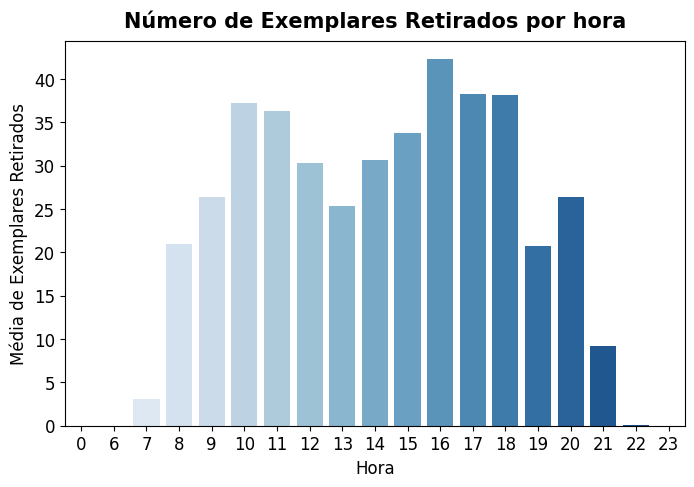

In [33]:
# Figura contendo um gráfico de colunas que expressa a dependencia do número médio de empréstimo ao longo das horas do dia.

fig = plt.figure(figsize=(8,5))

ax = sns.barplot(data = exemplares_hora, x = 'hora', y = 'numero_exemplares_retirados', palette = "Blues")
ax.set_title('Número de Exemplares Retirados por hora', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_xlabel('Hora', fontsize = 12)
ax.set_ylabel('Média de Exemplares Retirados', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)
ax.yaxis.set_tick_params(labelsize = 12)

Por fim, a média de retiradas de livros ao longo do dia, apresenta picos de atividade às 10, 11 e 16 h. Sendo assim, uma estratégia pertinente que a gestão da biblioteca pode adotar é diponibilizar mais servidores para atuar no cadastro das retiradas nestes horários de pico.

Outra análise extremamente pertinente para este projeto é a dependencia do número de empréstimos por variáveis categóricas, como o tipo de vínculo dos usuários, coleção, biblioteca e gênero.

Iniciando nossa análise pela variável categórica tipo de usuário. Inicialmente precisamos determinar quais são as categorias disponíveis.

In [34]:
dados_completos['tipo_vinculo_usuario'].unique()

array(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO', 'DOCENTE',
       'DOCENTE EXTERNO', 'SERVIDOR TÉCNICO-ADMINISTRATIVO',
       'ALUNO MÉDIO/TÉCNICO', 'USUÁRIO EXTERNO'], dtype=object)

Como passo seguinte, vamos criar um novo DataFrame contendo apenas as informações pertinentes, a fim de organizar a nossa leitura de dados. O DataFrame em questão possui os tipos de usuários e sua representação em porcentagem no número de retirada de exemplares.


In [35]:
emprestimos_por_tipo_usuario = pd.DataFrame(
    {
        'Tipo_usuario' : dados_completos['tipo_vinculo_usuario'].value_counts().index,
        'Percentual_emprestimo' : (dados_completos['tipo_vinculo_usuario'].value_counts(normalize = True) * 100).to_list()
    }
)

emprestimos_por_tipo_usuario

,Tipo_usuario,Percentual_emprestimo
0,ALUNO DE GRADUAÇÃO,79.893385
1,ALUNO DE PÓS-GRADUAÇÃO,14.579439
2,DOCENTE,2.987307
3,SERVIDOR TÉCNICO-ADMINISTRATIVO,1.466448
4,ALUNO MÉDIO/TÉCNICO,0.814627
5,DOCENTE EXTERNO,0.256998
6,USUÁRIO EXTERNO,0.001797


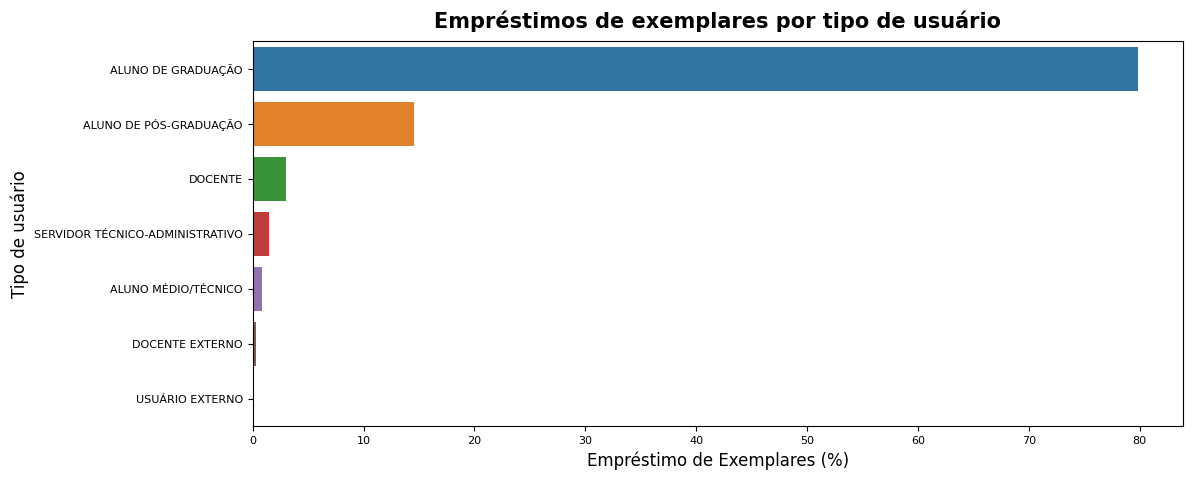

In [36]:
fig = plt.figure(figsize = (12, 5))

ax = sns.barplot(data = emprestimos_por_tipo_usuario, y = 'Tipo_usuario', x = 'Percentual_emprestimo')
ax.set_title('Empréstimos de exemplares por tipo de usuário', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_ylabel('Tipo de usuário', fontsize = 12)
ax.set_xlabel('Empréstimo de Exemplares (%)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 8)
ax.xaxis.set_tick_params(labelsize = 8)

plt.show()

De acordo com as informação obtidas e expostas acima, é possível notar inequivocamente que os alunos (graduação e pós-graduação) representam cera de 92% de todas as retiradas das bibliotecas da UFRN, sendo este um comportamento muito coerente, haja vista que esta classe representa aqueles que estão em formação, logo necessitam de muitas fontes de pesquisa e consulta. Com 77% das retiradas, os alunos de graduação lideram como principais usuários da biblioteca. De fato, devido a matriz curricular dos cursos de graduação serem de conhecimentos bem estabelecidos, é possível encontra-los de maneira muito mais clara, robusta e didática em livros, principais referências bibliográficas presentes em bibliotecas.

A pós graduação, por se tratar essencialmente de pesquisa na fronteira do conhecimento, tem como principal fonte de consulta periódicos nacionais e internacionar, que são majoritariamente veiculados em meios eletrônicos. Pontualmente são utilizados como fonte de consultas livros presentes em bibliotecas, salvo casos em que os pesquisadores de pós-graduação participam de disciplinas ou cursos.

Por fim, os funcionários representam uma pequena parcela das retiradas das bibliotecas, pois com excessão dos docentes, estes não são obrigados a participar de atividades acadêmicas que necessitam de fontes de consultas bibliográficas.

A partir desta análise, é possível orientar a equipe de manutenção de livros a ter máximo cuidado com os livros utilizados por cursos de graduação, haja vista que estes são os mais utilizados e portanto os que mais sofrem desgastes. Além disso, a gestão da biblioteca a fim de manter o seu acervo relevante e atrativo, deve sempre que possível atender a solicitações de compras de livros especialmente aqueles direcionados para cursos de graduação.

In [37]:
dados_completos['colecao'].unique()

array(['Acervo Circulante', 'Folhetos', 'Teses', 'Dissertações',
       'Monografias', 'Publicações de Autores do RN',
       'Publicações da UFRN', 'Multimeios', 'Coleção Mossoroense',
       'Eventos', 'Trabalho Acadêmico', 'Obras de Referência',
       'Obras Raras', 'Literatura de Cordel', 'Coleção Zila Mamede',
       'Necessidades Educacionais Específicas'], dtype=object)

In [38]:
emprestimos_por_colecao = pd.DataFrame(
    {
        'Colecao' : dados_completos['colecao'].value_counts().index,
        'Percentual_emprestimo' : (dados_completos['colecao'].value_counts(normalize = True) * 100).to_list()
    }
)

emprestimos_por_colecao

,Colecao,Percentual_emprestimo
0,Acervo Circulante,99.157141
1,Multimeios,0.375317
2,Monografias,0.175382
3,Dissertações,0.088889
4,Obras de Referência,0.055267
5,Publicações de Autores do RN,0.047225
6,Publicações da UFRN,0.039354
7,Teses,0.036189
8,Folhetos,0.009753
9,Trabalho Acadêmico,0.005989


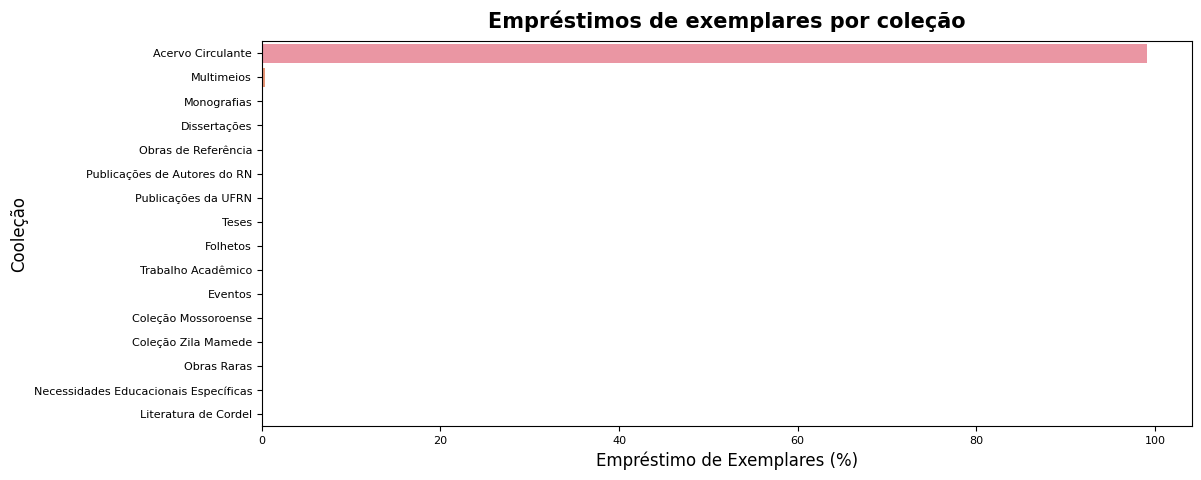

In [39]:
fig = plt.figure(figsize = (12, 5))

ax = sns.barplot(data = emprestimos_por_colecao, y = 'Colecao', x = 'Percentual_emprestimo')
ax.set_title('Empréstimos de exemplares por coleção', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_ylabel('Cooleção', fontsize = 12)
ax.set_xlabel('Empréstimo de Exemplares (%)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 8)
ax.xaxis.set_tick_params(labelsize = 8)

plt.show()

Em conformidade com a análise anterior, o acervo circulante que representa os livros, representa cerca de 99 % das retiradas das bibliotecas. Ratificando o fato de que as bibliotecas da UFRN são utilizadas quase que exclusivamente para consulta de referências bibliográficas pertinentes para disciplinas, seja de graduação ou pós-graduação.  

In [40]:
dados_completos['biblioteca'].unique()

array(['Biblioteca Central Zila Mamede',
       'Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba',
       'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN',
       'Biblioteca Setorial do Centro Ciências da Saúde - CCS',
       'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia',
       'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET',
       'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA',
       'Biblioteca Setorial Prof. Horácio Nicolas Solimo - \xad Engenharia Química - EQ - CT',
       'Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ',
       'Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA',
       'Biblioteca Setorial do Departamento de Artes - DEART',
       'Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - \xadCT',
       'Biblioteca Setorial Árvore do Conhecimento - In

In [41]:
emprestimos_por_biblioteca = pd.DataFrame(
    {
        'Biblioteca' : dados_completos['biblioteca'].value_counts().index,
        'Percentual_emprestimo' : (dados_completos['biblioteca'].value_counts(normalize = True) * 100).to_list()
    }
)

emprestimos_por_biblioteca

,Biblioteca,Percentual_emprestimo
0,Biblioteca Central Zila Mamede,76.127384
1,Biblioteca Setorial do Centro Ciências da Saúd...,6.731920
2,Biblioteca Setorial da Faculdade de Ciências d...,3.525087
3,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,2.583672
4,Biblioteca Setorial Prof. Alberto Moreira Camp...,2.285352
5,Biblioteca Setorial do Centro de Ciências Huma...,2.091149
6,Biblioteca Setorial Prof. Ronaldo Xavier de Ar...,1.404251
7,Biblioteca Setorial Prof. Francisco Gurgel De ...,1.275068
8,Biblioteca Setorial Profª. Maria Lúcia da Cost...,0.870407
9,Biblioteca Setorial Pe. Jaime Diniz - Escola d...,0.860140


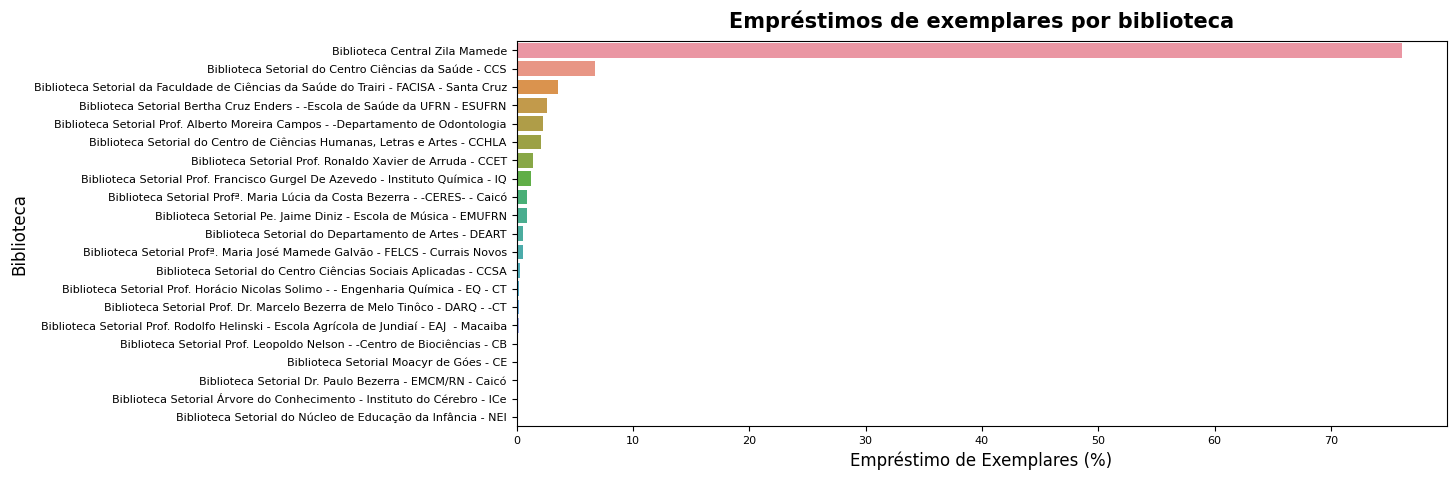

In [42]:
fig = plt.figure(figsize = (12, 5))

ax = sns.barplot(data = emprestimos_por_biblioteca, y = 'Biblioteca', x = 'Percentual_emprestimo')
ax.set_title('Empréstimos de exemplares por biblioteca', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_ylabel('Biblioteca', fontsize = 12)
ax.set_xlabel('Empréstimo de Exemplares (%)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 8)
ax.xaxis.set_tick_params(labelsize = 8)

plt.show()

O uso das bibliotecas é dependente de diversos fatores, como números de alunos que possuem acesso a cada unidade, especialização de temas de cada unidade e tamanho do acervo. Nesta perspectiva, naturalmente a biblioteca central terá o maior acervo e também o maior número de usuários, refletindo no número de retirada de exemplares, conforme elucidade acima.

Sendo assim, a gestão das bibliotecas da UFRN deve levar em conta o volume de emprestimos em cada biblioteca, para distribuir de maneira eficiente o número de servidores em cada unidade.

In [43]:
dados_completos['Genero'].unique()

array(['Ciências Aplicadas', 'Linguagem, Lingua, Linguistica',
       'Ciências Sociais', 'Geoografia, Biografia, História',
       'Matemática e Ciências naturais', 'Religião',
       'Generalidades, Ciência e Conhecimento', 'Filosofia e Psicologia',
       'Belas Artes', 'Ciência'], dtype=object)

In [44]:
emprestimos_por_genero = pd.DataFrame(
    {
        'Genero' : dados_completos['Genero'].value_counts().index,
        'Percentual_emprestimo' : (dados_completos['Genero'].value_counts(normalize = True) * 100).to_list()
    }
)

emprestimos_por_genero

,Genero,Percentual_emprestimo
0,Ciências Aplicadas,97.213655
1,Ciências Sociais,2.615583
2,Filosofia e Psicologia,0.031226
3,"Generalidades, Ciência e Conhecimento",0.027377
4,Matemática e Ciências naturais,0.027291
5,Belas Artes,0.023612
6,Religião,0.021388
7,"Geoografia, Biografia, História",0.020532
8,"Linguagem, Lingua, Linguistica",0.019249
9,Ciência,0.000086


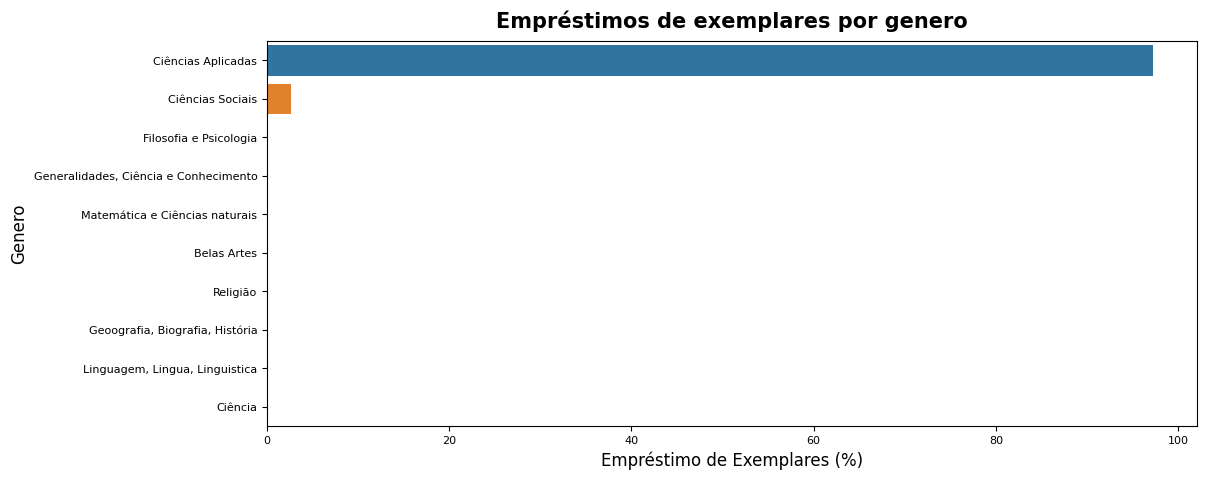

In [45]:
fig = plt.figure(figsize = (12, 5))

ax = sns.barplot(data = emprestimos_por_genero, y = 'Genero', x = 'Percentual_emprestimo')
ax.set_title('Empréstimos de exemplares por genero', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_ylabel('Genero', fontsize = 12)
ax.set_xlabel('Empréstimo de Exemplares (%)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 8)
ax.xaxis.set_tick_params(labelsize = 8)

plt.show()

Por fim o gênero mais requisitado nas bibliotecas da UFRN é o de Ciências Aplicadas. Contudo este indicador pode ser fortemente enviezado pelo número de alunos de cada curso de graduação. Sendo assim, para uma análise mais robusta, seria necessário normalizar estes dados pelo número de alunos de cada curso.

Conforme observado anteriormente, os principais usuários das bibliotecas da UFRN são alunos de graduação e pós-graduação. Sendo assim, é de interesse da gestão da biblioteca identificar e comparar o comportamento destes dois grupos ao longo dos anos.

In [46]:
#inicialmente é necessário realizar uma consulta em nosso DataFrame contendo apenas alunos de graduação e pós-graduação.
#Em seguida, é necessário apenas da informação de data da retirada para quantificar o número de retiradas de cada um destes grupos.
retiradas_alunos = dados_completos.query('tipo_vinculo_usuario in ["ALUNO DE GRADUAÇÃO", "ALUNO DE PÓS-GRADUAÇÃO"]')
retiradas_alunos = retiradas_alunos[['data_emprestimo', 'tipo_vinculo_usuario']]
retiradas_alunos['data_emprestimo'] = pd.to_datetime(retiradas_alunos['data_emprestimo'])
retiradas_alunos['data_emprestimo'] = retiradas_alunos['data_emprestimo'].dt.year
retiradas_alunos = retiradas_alunos.groupby(['data_emprestimo', 'tipo_vinculo_usuario']).size().reset_index(name = 'numero_de_retiradas')
retiradas_alunos

,data_emprestimo,tipo_vinculo_usuario,numero_de_retiradas
0,2010,ALUNO DE GRADUAÇÃO,126449
1,2010,ALUNO DE PÓS-GRADUAÇÃO,24216
2,2011,ALUNO DE GRADUAÇÃO,159670
3,2011,ALUNO DE PÓS-GRADUAÇÃO,25850
4,2012,ALUNO DE GRADUAÇÃO,150712
5,2012,ALUNO DE PÓS-GRADUAÇÃO,23169
6,2013,ALUNO DE GRADUAÇÃO,125525
7,2013,ALUNO DE PÓS-GRADUAÇÃO,20447
8,2014,ALUNO DE GRADUAÇÃO,93037
9,2014,ALUNO DE PÓS-GRADUAÇÃO,17323


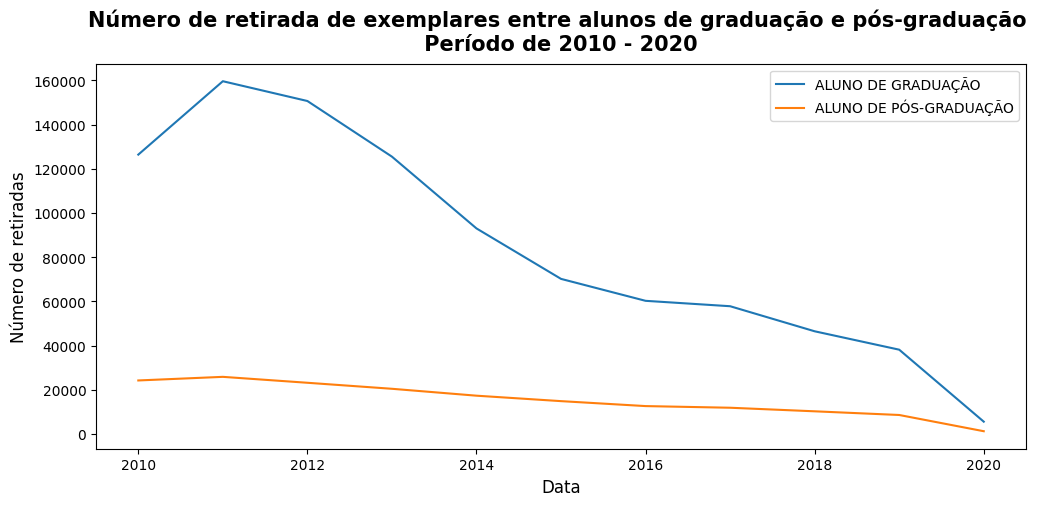

In [47]:
fig = plt.figure(figsize = (12,5))

ax = sns.lineplot(data = retiradas_alunos, x = 'data_emprestimo', y = 'numero_de_retiradas', hue = 'tipo_vinculo_usuario')
ax.set_title('Número de retirada de exemplares entre alunos de graduação e pós-graduação \n Período de 2010 - 2020 ', fontsize =15, fontweight = 'bold', pad = 10)
ax.set_xlabel('Data', fontsize = 12)
ax.set_ylabel('Número de retiradas', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 10)
ax.yaxis.set_tick_params(labelsize = 10)

plt.legend(fontsize = 10)

O comportamento de retirada de exemplares entre os alunos de graduação e pós-graduação são distintos, mesmo em periódo de isolamento social na pandemia. Os alunos de pós-graduação apresentaram uma queda acentuada no número de retiradas de exemplares das bibliotecas entre os anos de 2010 e 2011, contuno nos anos seguintes, manteve-se com comportamento estável, com número anual de retiradas em torno de 10000 unidades. Vale mencionar, conforme já explorado acima, os livros em bibliotecar não são as principais fontes bibliográficas da pós-graduação, portanto, a maior disponibilidade de informação digital, não afetou de maneira tão intensa as retiradas deste grupo.

Por outro lado, a graduação, sendo o principal grupo de usuários da biblioteca, apresentou uma queda vertiginosa ao longo dos anos, culminando em um mínimo em 2020 em torno de 20000 exemplares ao ano. No período pré pandemia, a redução nos números de retiradas majoritariamente se deve ao aumento da disponibilidade de material bibliográfico de maneira digital. Em períodos de isolamento social (2020) a queda se deve as restrições de acesso a biblioteca.

In [48]:
#nova consulta para construção dos box plots
retiradas_alunos = dados_completos.query('tipo_vinculo_usuario in ["ALUNO DE GRADUAÇÃO", "ALUNO DE PÓS-GRADUAÇÃO"]')
retiradas_alunos = retiradas_alunos[['data_emprestimo', 'tipo_vinculo_usuario']]
retiradas_alunos['data_emprestimo'] = pd.to_datetime(retiradas_alunos['data_emprestimo'])
retiradas_alunos['ano'] = retiradas_alunos['data_emprestimo'].dt.year
retiradas_alunos['mes'] = retiradas_alunos['data_emprestimo'].dt.month
retiradas_alunos = retiradas_alunos.drop(columns = 'data_emprestimo').reset_index(drop = True)
retiradas_alunos = retiradas_alunos.groupby(['ano', 'mes', 'tipo_vinculo_usuario']).size().reset_index(name = 'numero_de_retiradas')
retiradas_alunos

,ano,mes,tipo_vinculo_usuario,numero_de_retiradas
0,2010,1,ALUNO DE GRADUAÇÃO,3012
1,2010,1,ALUNO DE PÓS-GRADUAÇÃO,1125
2,2010,2,ALUNO DE GRADUAÇÃO,7807
3,2010,2,ALUNO DE PÓS-GRADUAÇÃO,1508
4,2010,3,ALUNO DE GRADUAÇÃO,15414
...,...,...,...,...
242,2020,2,ALUNO DE GRADUAÇÃO,2415
243,2020,2,ALUNO DE PÓS-GRADUAÇÃO,375
244,2020,3,ALUNO DE GRADUAÇÃO,2709
245,2020,3,ALUNO DE PÓS-GRADUAÇÃO,503


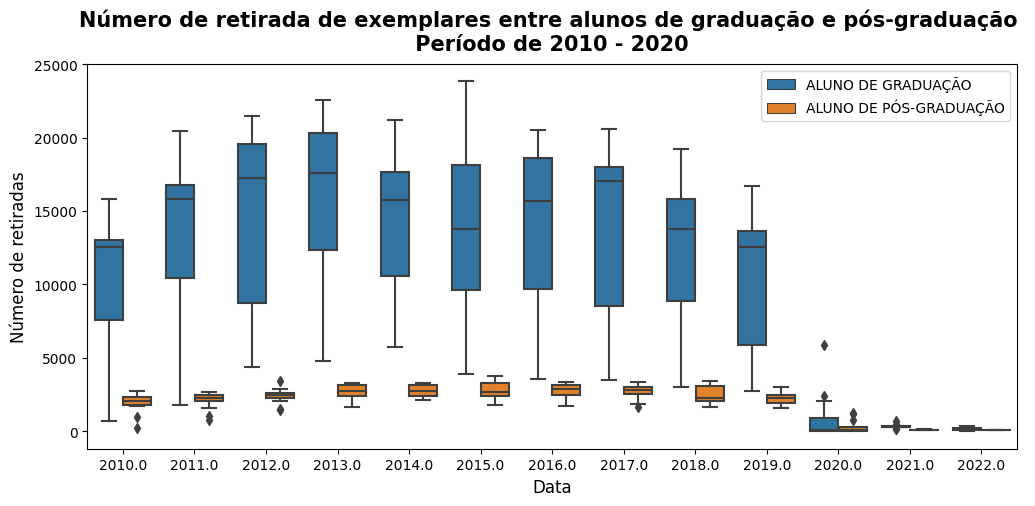

In [ ]:
fig = plt.figure(figsize = (12,5))

ax = sns.boxplot(data = retiradas_alunos, x = 'ano', y = 'numero_de_retiradas', hue = 'tipo_vinculo_usuario')
ax.set_title('Número de retirada de exemplares entre alunos de graduação e pós-graduação \n Período de 2010 - 2020 ', fontsize =15, fontweight = 'bold', pad = 10)
ax.set_xlabel('Data', fontsize = 12)
ax.set_ylabel('Número de retiradas', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 10)
ax.yaxis.set_tick_params(labelsize = 10)

plt.legend(fontsize = 10)

Nos foi fornecido dados adicionais sobre quais cursos cada aluno que realizou uma retirada estuda na UFRN. Sendo assim foi carregado estes dados em um novo DataFrame.

In [49]:
alunos_ate_2010 = pd.read_excel('/content/matricula_alunos.xlsx', skiprows=1)
alunos_ate_2010.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
alunos_apos_2010 = pd.read_excel('/content/matricula_alunos.xlsx', sheet_name = 'Após 2010', skiprows=1)
alunos_apos_2010.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
alunos = pd.concat([alunos_ate_2010, alunos_apos_2010], ignore_index = True)
alunos.tipo_vinculo_usuario.unique()

array(['ALUNO DE GRADUAÇÃO'], dtype=object)

In [50]:
df2 = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?utm_medium=email&_hsmi=270881120&_hsenc=p2ANqtz-8T21u8xYdoT8xQ3CukH1KHRK1NNchPaYuv7xkaSvRaMumpAEjEoc4xWWNnm-ayPHV0M9JK9hdidc6xfFojnxirbq063A&utm_content=270881120&utm_source=hs_automation')
graduacao = pd.read_json(df2.registros[0])
alunos = pd.concat([alunos, graduacao], ignore_index=True)
alunos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,1.900017e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,1.990145e+08,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,1.997357e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,1.998124e+08,ALUNO DE GRADUAÇÃO,LETRAS
4,1.998237e+08,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
72797,2.020001e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72798,2.020004e+10,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
72799,2.020013e+10,ALUNO DE GRADUAÇÃO,AGRONOMIA
72800,2.020001e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [54]:
#Formatando a coluna de matrícula para uma string, facilitando assim a visualização destes dados, uma vez que são tratados como uma variável categórica.
alunos['matricula_ou_siape'] = alunos['matricula_ou_siape'].astype('str')
alunos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72798,20200039601.0,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
72799,20200132517.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


Foi solicitado avaliar o padrão de retiradas da biblioteca, de alunos de graduação dos seguintes cursos:
* Biblioteconomia
* Ciências Sociais
* Comunicação Social
* Direito
* Filosofia
* Pedagogia

In [55]:
alunos_avalaliacao = alunos.query('curso in ["BIBLIOTECONOMIA", "CIÊNCIAS SOCIAIS", "COMUNICAÇÃO SOCIAL", "DIREITO", "FILOSOFIA", "PEDAGOGIA"]')
alunos_avalaliacao.reset_index(drop = True)

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,200031011.0,ALUNO DE GRADUAÇÃO,DIREITO
1,200045080.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
2,200115053.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
3,200123382.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
4,200123730.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...
18828,20200097481.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
18829,20200107087.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
18830,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
18831,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


Agora utilizando o nosso banco de dados de retiradas de exemplares da biblioteca, podemos realizar uma consulta contendo apenas as retiradas de alunos de graduação, que cursam os cursos solicitados pela gestão da biblioteca.

In [58]:
emprestimo_avaliacao = dados_completos.query("tipo_vinculo_usuario == 'ALUNO DE GRADUAÇÃO'")
emprestimo_avaliacao = emprestimo_avaliacao[['tipo_vinculo_usuario', 'data_emprestimo', 'matricula_ou_siape']]
emprestimo_avaliacao['matricula_ou_siape'] = emprestimo_avaliacao['matricula_ou_siape'].astype('str')
emprestimo_avaliacao['data_emprestimo'] = pd.to_datetime(emprestimo_avaliacao['data_emprestimo']).dt.year
emprestimo_avaliacao = emprestimo_avaliacao.merge(alunos_avalaliacao)
emprestimo_avaliacao = emprestimo_avaliacao.query('data_emprestimo >= 2015')
emprestimo_avaliacao.drop(columns = ['matricula_ou_siape', 'tipo_vinculo_usuario'], inplace = True)

In [59]:
emprestimos_por_curso = emprestimo_avaliacao.groupby(['data_emprestimo', 'curso']).value_counts().reset_index()
emprestimos_por_curso.columns = ['ano', 'curso', 'numero_emprestimos']


In [60]:
emprestimos_por_curso = emprestimos_por_curso.pivot_table(index = 'curso',
                                                          columns = 'ano',
                                                          values = 'numero_emprestimos',
                                                          margins = True,
                                                          margins_name = 'Total',
                                                          aggfunc = 'sum')

emprestimos_por_curso

ano,2015,2016,2017,2018,2019,2020,Total
curso,,,,,,,
BIBLIOTECONOMIA,3420,2676,2600,2027,1825,280,12828
CIÊNCIAS SOCIAIS,3153,2610,2489,1950,1695,226,12123
COMUNICAÇÃO SOCIAL,3024,2825,2773,2195,1782,233,12832
DIREITO,3309,2833,2823,2087,1649,270,12971
FILOSOFIA,2924,2663,2520,1966,1686,291,12050
PEDAGOGIA,2936,2609,2629,2048,1750,247,12219
Total,18766,16216,15834,12273,10387,1547,75023


Realizando o mesmo procedimento, agora para os aluno de pós-graduação, levando em consideração todos os cursos disponíveis na universidade.

In [61]:
df2 = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?utm_medium=email&_hsmi=270881120&_hsenc=p2ANqtz-8T21u8xYdoT8xQ3CukH1KHRK1NNchPaYuv7xkaSvRaMumpAEjEoc4xWWNnm-ayPHV0M9JK9hdidc6xfFojnxirbq063A&utm_content=270881120&utm_source=hs_automation')
pos_graduacao = pd.read_json(df2.registros[1])
pos_graduacao.drop(columns = 'tipo_vinculo_usuario', inplace = True)
pos_graduacao['matricula_ou_siape'] = pos_graduacao['matricula_ou_siape'].astype('float')
pos_graduacao['matricula_ou_siape'] = pos_graduacao['matricula_ou_siape'].astype('float')['matricula_ou_siape'] = pos_graduacao['matricula_ou_siape'].astype('str')
pos_graduacao

,matricula_ou_siape,curso
0,2008112114.0,CIÊNCIAS ODONTOLÓGICAS
1,2008106583.0,ENGENHARIA DE SOFTWARE
2,2011101417.0,ARQUITETURA E URBANISMO
3,2011113122.0,FILOSOFIA
4,2010110903.0,ARTES CÊNICAS
...,...,...
19435,20201013501.0,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062.0,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690.0,CIÊNCIAS DA SAÚDE
19438,20201014465.0,DESIGN


In [71]:
emprestimos_pos_graduacao = dados_completos.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
emprestimos_pos_graduacao = emprestimos_pos_graduacao[['data_emprestimo', 'matricula_ou_siape']]
emprestimos_pos_graduacao['matricula_ou_siape'] = emprestimos_pos_graduacao['matricula_ou_siape'].astype('str')
emprestimos_pos_graduacao = emprestimos_pos_graduacao.merge(pos_graduacao)
emprestimos_pos_graduacao['data_emprestimo'] = pd.to_datetime(emprestimos_pos_graduacao['data_emprestimo']).dt.year
emprestimos_pos_graduacao.drop(columns = 'matricula_ou_siape', inplace=True)
emprestimos_pos_graduacao = emprestimos_pos_graduacao.query('data_emprestimo >= 2017')
emprestimos_pos_graduacao = emprestimos_pos_graduacao.groupby(['data_emprestimo', 'curso']).value_counts().reset_index()
emprestimos_pos_graduacao.columns = ['ano', 'curso', 'numero_de_emprestimos']
emprestimos_pos_graduacao.head()

,ano,curso,numero_de_emprestimos
0,2017,ADMINISTRAÇÃO,990
1,2017,ARQUITETURA E URBANISMO,792
2,2017,ARTES CÊNICAS,815
3,2017,BIOINFORMÁTICA,757
4,2017,BIOQUÍMICA,786


In [72]:
emprestimos_pos_graduacao

,ano,curso,numero_de_emprestimos
0,2017,ADMINISTRAÇÃO,990
1,2017,ARQUITETURA E URBANISMO,792
2,2017,ARTES CÊNICAS,815
3,2017,BIOINFORMÁTICA,757
4,2017,BIOQUÍMICA,786
5,2017,CIÊNCIA E ENGENHARIA DE MATERIAIS,856
6,2017,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",944
7,2017,CIÊNCIAS DA SAÚDE,821
8,2017,CIÊNCIAS ODONTOLÓGICAS,893
9,2017,DESIGN,789


In [64]:
emprestimos_pos_graduacao['curso'].unique()

array(['ADMINISTRAÇÃO', 'ARQUITETURA E URBANISMO', 'ARTES CÊNICAS',
       'BIOINFORMÁTICA', 'BIOQUÍMICA',
       'CIÊNCIA E ENGENHARIA DE MATERIAIS',
       'CIÊNCIA, TECNOLOGIA E INOVAÇÃO', 'CIÊNCIAS DA SAÚDE',
       'CIÊNCIAS ODONTOLÓGICAS', 'DESIGN', 'ENGENHARIA CIVIL',
       'ENGENHARIA DE SOFTWARE', 'FILOSOFIA',
       'GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO'], dtype=object)

In [65]:
previsão = pd.DataFrame(
    {
        'ano': np.full(14, 2022),
        'curso' : emprestimos_pos_graduacao['curso'].unique(),
        'numero_de_emprestimos' : [1905, 1896, 1920, 2302, 2090, 2010, 1960, 1730, 2405, 1900, 1920, 1890, 1903, 1855]
    }
)
previsão

,ano,curso,numero_de_emprestimos
0,2022,ADMINISTRAÇÃO,1905
1,2022,ARQUITETURA E URBANISMO,1896
2,2022,ARTES CÊNICAS,1920
3,2022,BIOINFORMÁTICA,2302
4,2022,BIOQUÍMICA,2090
5,2022,CIÊNCIA E ENGENHARIA DE MATERIAIS,2010
6,2022,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",1960
7,2022,CIÊNCIAS DA SAÚDE,1730
8,2022,CIÊNCIAS ODONTOLÓGICAS,2405
9,2022,DESIGN,1900


In [66]:
evolucao_emprestimos_pos_atual_previsto = pd.concat([previsão, emprestimos_pos_graduacao], ignore_index = True)
evolucao_emprestimos_pos_atual_previsto

,ano,curso,numero_de_emprestimos
0,2022,ADMINISTRAÇÃO,1905
1,2022,ARQUITETURA E URBANISMO,1896
2,2022,ARTES CÊNICAS,1920
3,2022,BIOINFORMÁTICA,2302
4,2022,BIOQUÍMICA,2090
...,...,...,...
65,2020,DESIGN,95
66,2020,ENGENHARIA CIVIL,91
67,2020,ENGENHARIA DE SOFTWARE,61
68,2020,FILOSOFIA,103


In [67]:
def deferenca_retiradas(ano1, ano2):
  lista = []
  for i in evolucao_emprestimos_pos_atual_previsto['curso'].unique():
    x = evolucao_emprestimos_pos_atual_previsto.query(f'curso == "{i}" and ano == {ano1}')['numero_de_emprestimos'].iloc[0]
    y = evolucao_emprestimos_pos_atual_previsto.query(f'curso == "{i}" and ano == {ano2}')['numero_de_emprestimos'].iloc[0]
    resultado = round(((y/x)- 1) * 100, 2)
    lista.append(resultado)
  return lista

In [82]:
diferenca_2017_2018 = deferenca_retiradas(2017, 2018)
diferenca_2018_2019 = deferenca_retiradas(2018, 2019)
diferenca_2019_2022= deferenca_retiradas(2019, 2022)

In [83]:
variacao_emprestimos_pos_atual_previsto = pd.DataFrame(
    {
        'curso' : evolucao_emprestimos_pos_atual_previsto['curso'].unique(),
        '2017-2018' : diferenca_2017_2018,
        '2018-2019' : diferenca_2018_2019,
        '2019-2022' : diferenca_2019_2022
    }
)

variacao_emprestimos_pos_atual_previsto

,curso,2017-2018,2018-2019,2019-2022
0,ADMINISTRAÇÃO,-17.68,-35.09,260.11
1,ARQUITETURA E URBANISMO,-18.06,-2.31,199.05
2,ARTES CÊNICAS,-8.34,-19.41,218.94
3,BIOINFORMÁTICA,-17.70,-15.25,335.98
4,BIOQUÍMICA,-15.78,-7.10,239.84
5,CIÊNCIA E ENGENHARIA DE MATERIAIS,-12.73,-8.70,194.72
6,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",-12.29,-20.05,196.07
7,CIÊNCIAS DA SAÚDE,-14.49,-12.39,181.30
8,CIÊNCIAS ODONTOLÓGICAS,-6.27,-17.56,248.55
9,DESIGN,-13.94,-16.05,233.33


In [84]:
def color_negative(v, color):
    return f"color: {color};" if v < 0 else None

variacao_emprestimos_pos_atual_previsto.style.applymap(color_negative, subset=['2017-2018', '2018-2019', '2019-2022'], color='red')


,curso,2017-2018,2018-2019,2019-2022
0,ADMINISTRAÇÃO,-17.680000,-35.090000,260.110000
1,ARQUITETURA E URBANISMO,-18.060000,-2.310000,199.050000
2,ARTES CÊNICAS,-8.340000,-19.410000,218.940000
3,BIOINFORMÁTICA,-17.700000,-15.250000,335.980000
4,BIOQUÍMICA,-15.780000,-7.100000,239.840000
5,CIÊNCIA E ENGENHARIA DE MATERIAIS,-12.730000,-8.700000,194.720000
6,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",-12.290000,-20.050000,196.070000
7,CIÊNCIAS DA SAÚDE,-14.490000,-12.390000,181.300000
8,CIÊNCIAS ODONTOLÓGICAS,-6.270000,-17.560000,248.550000
9,DESIGN,-13.940000,-16.050000,233.330000
